# Compare two different patterns

In [1]:
import torch as th
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
import scipy as sp
from utils import correlation_map_with_CCF
from IPython.display import clear_output

In [2]:
#load_data first
tmp = np.load("../data/04_18_autoencoder_result_10pm_Feb_27_with_sparsity.npz")
PPs1 = tmp['PPs']
original_shape = PPs1.shape
PPs1 = PPs1.reshape([18,-1])
PPs1 = PPs1 / np.linalg.norm(PPs1, axis=1)[:,None]

In [3]:
#load_data second
tmp = np.load("../code/reza/nmf_result_ncomp_18.npz")
PPs2 = tmp['A']
PPs2 = PPs2 / np.linalg.norm(PPs2, axis=1)[:,None]

In [4]:
#preprocess compute the cross correlation matrix
corr_matrix = PPs2 @ PPs1.T
_, orders = sp.optimize.linear_sum_assignment(-corr_matrix)
corr_matrix = corr_matrix[:, orders]

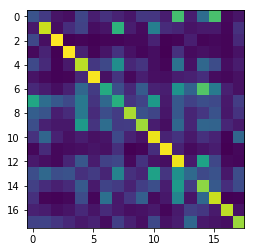

In [5]:
#visualize the correlation matrix
plt.imshow(corr_matrix)
plt.show()

In [ ]:
#visualize different patterns together
PPsA = PPs2.reshape(original_shape)
PPsB = PPs1.reshape(original_shape)
for i in range(18):
    _, (a, b, c, d, e, f) = plt.subplots(1, 6, figsize=(15, 5))
    a.imshow(np.mean(PPsA[i, :, :, :], 2).T)
    b.imshow(np.mean(PPsA[i, :, :, :], 1))
    c.imshow(np.mean(PPsA[i, :, :, :], 0))
    a.text(1, 5, 'NMF: PP {}'.format(i), color='w', fontsize=15)
    b.text(1, 5, 'NMF: PP {}'.format(i), color='w', fontsize=15)
    c.text(1, 5, 'NMF: PP {}'.format(i), color='w', fontsize=15)
    d.imshow(np.mean(PPsB[orders[i], :, :, :], 2).T)
    e.imshow(np.mean(PPsB[orders[i], :, :, :], 1))
    f.imshow(np.mean(PPsB[orders[i], :, :, :], 0))
    d.text(1, 5, 'AE: PP {}'.format(i), color='w', fontsize=15)
    e.text(1, 5, 'AE: PP {}'.format(i), color='w', fontsize=15)
    f.text(1, 5, 'AE: PP {}'.format(i), color='w', fontsize=15)
    

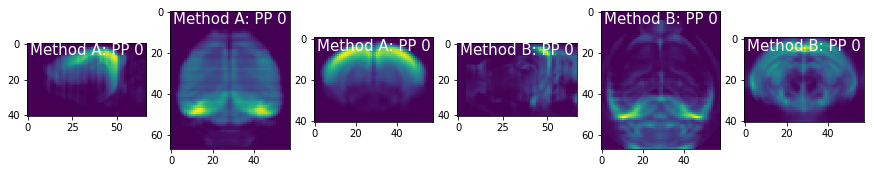

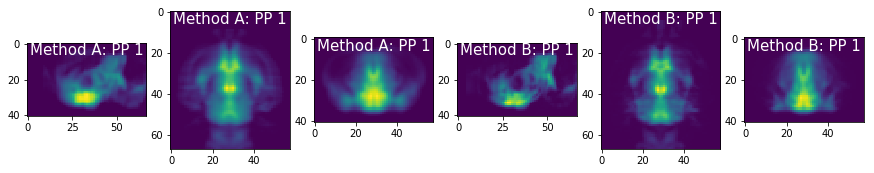

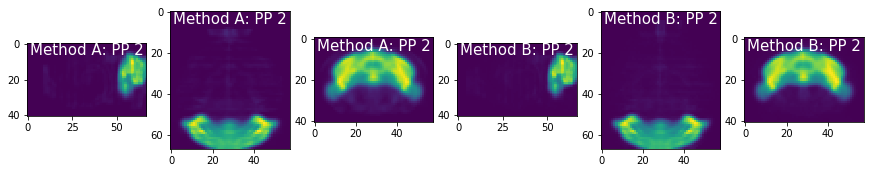

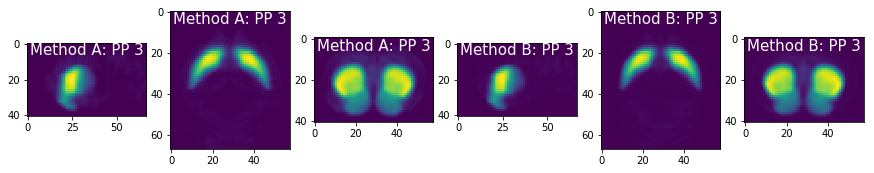

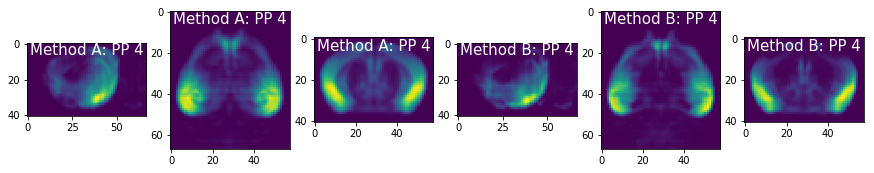

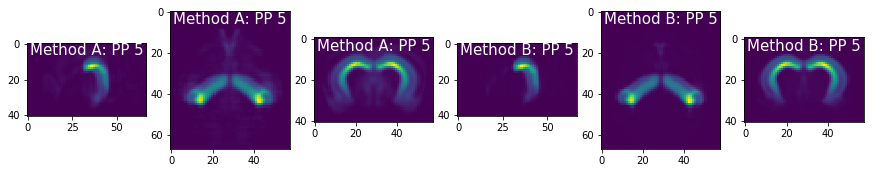

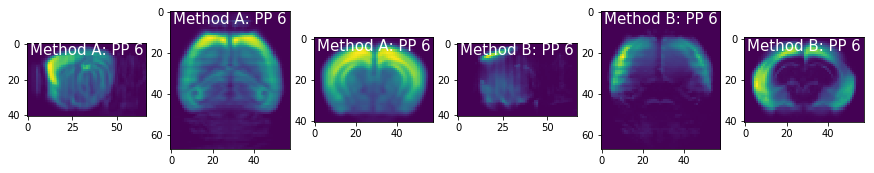

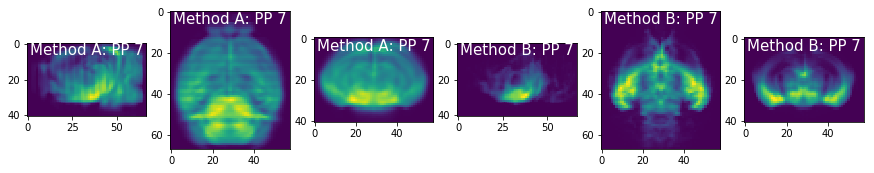

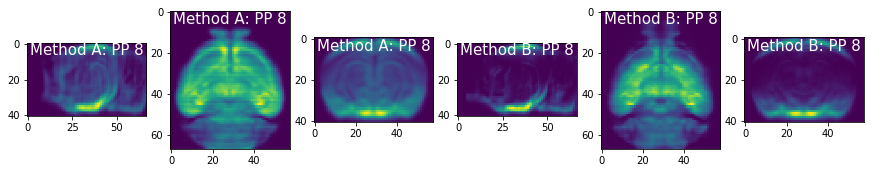

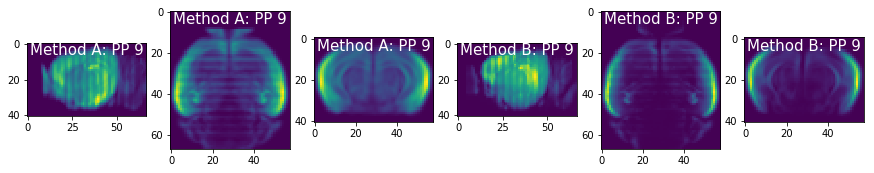

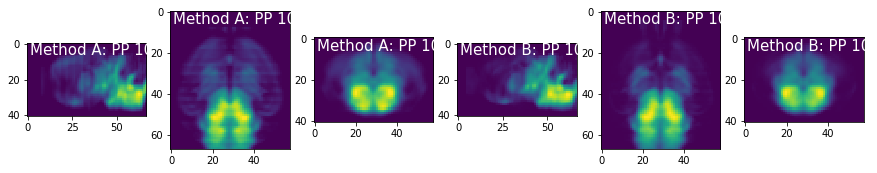

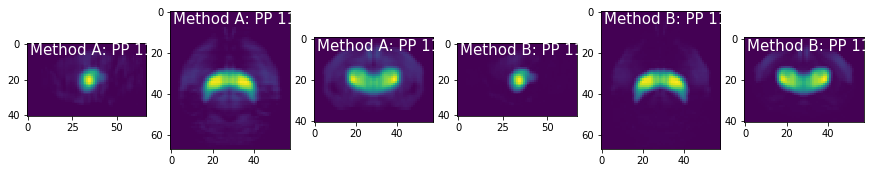

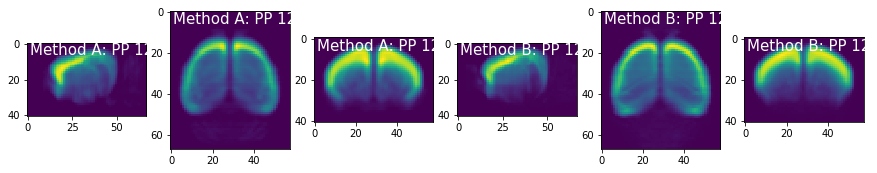

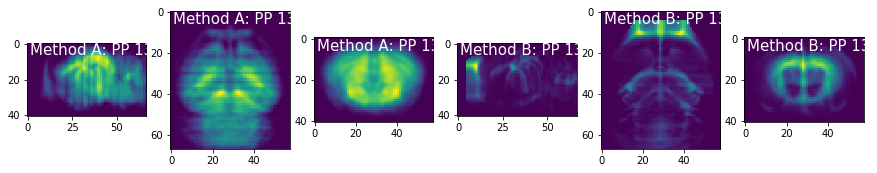

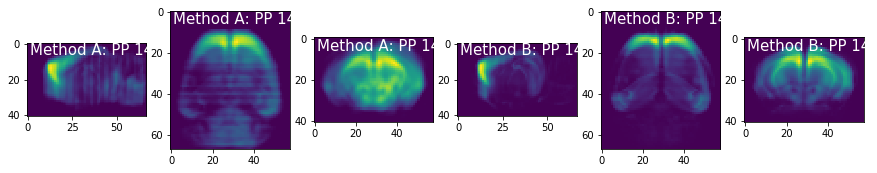

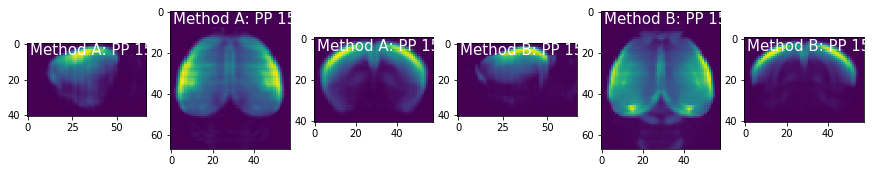

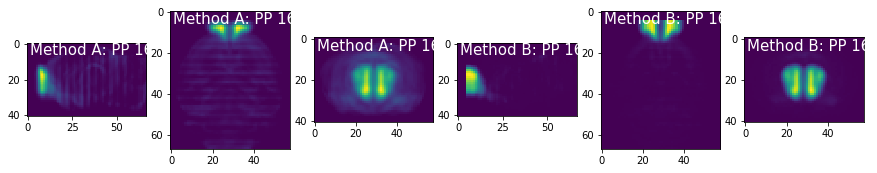

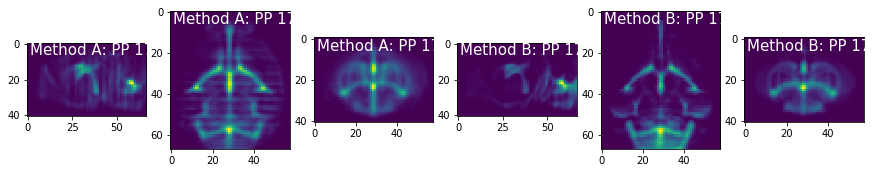

In [6]:
#visualize different patterns together
PPsA = PPs2.reshape(original_shape)
PPsB = PPs1.reshape(original_shape)
for i in range(18):
    aaa, (a, b, c, d, e, f) = plt.subplots(1, 6, figsize=(15, 5))
    a.imshow(np.mean(PPsA[i, :, :, :], 2).T)
    b.imshow(np.mean(PPsA[i, :, :, :], 1))
    c.imshow(np.mean(PPsA[i, :, :, :], 0))
    a.text(1, 6, 'Method A: PP {}'.format(i), color='w', fontsize=15)
    b.text(1, 6, 'Method A: PP {}'.format(i), color='w', fontsize=15)
    c.text(1, 6, 'Method A: PP {}'.format(i), color='w', fontsize=15)
    d.imshow(np.mean(PPsB[orders[i], :, :, :], 2).T)
    e.imshow(np.mean(PPsB[orders[i], :, :, :], 1))
    f.imshow(np.mean(PPsB[orders[i], :, :, :], 0))
    d.text(1, 6, 'Method B: PP {}'.format(i), color='w', fontsize=15)
    e.text(1, 6, 'Method B: PP {}'.format(i), color='w', fontsize=15)
    f.text(1, 6, 'Method B: PP {}'.format(i), color='w', fontsize=15)
    aaa.savefig("figure_{}.png".format(i))
    